In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pylab import imread
from skimage.color import rgb2gray

In [1]:
def imshows(ImageData, LabelData, rows, cols, gridType=False):
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if (rows == 1 & cols == 1):
        fig = plt.figure(figsize=(20,20))
    else: 
        fig = plt.figure(figsize=(cols*8, rows*5))
    for i in range (1, rows * cols + 1):
        fig.add_subplot(rows, cols, i)
        image = ImageArray[i - 1]
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.grid(gridType)
        plt.title(LabelArray[i - 1])
    plt.show()
    
def ShowThreeImages(IM1, IM2, IM3, LB1="Image 1", LB2="Image 2", LB3="Image 3"):
    imshows([IM1, IM2, IM3], [LB1, LB2, LB3], 1, 3)
    
def ShowTwoImages(IM1, IM2, LB1="Image 1", LB2="Image 2"):
    imshows([IM1, IM2], [LB1, LB2], 1, 2)
    
def ShowOneImage(IM, LB="Image"):
    imshows([IM], [LB], 1, 1)
    
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listIamge)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)
            

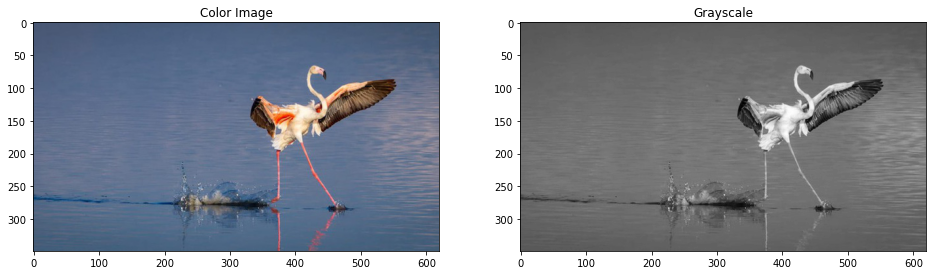

In [3]:
#EX:1
##Convert a color image to grayscale
img_color = imread("Image/pic1.jpg")
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
ShowTwoImages(img_color, img_gray, "Color Image", "Grayscale")

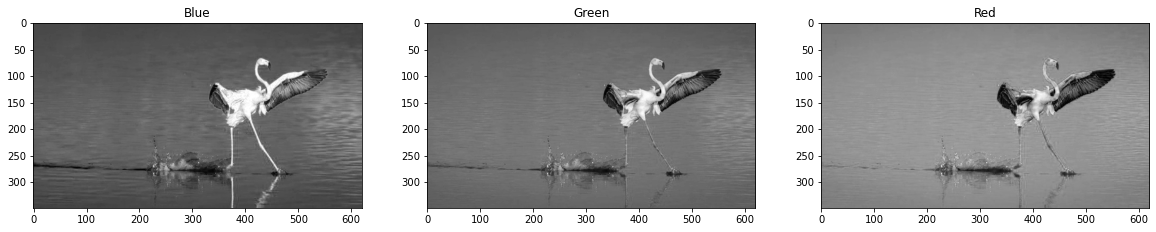

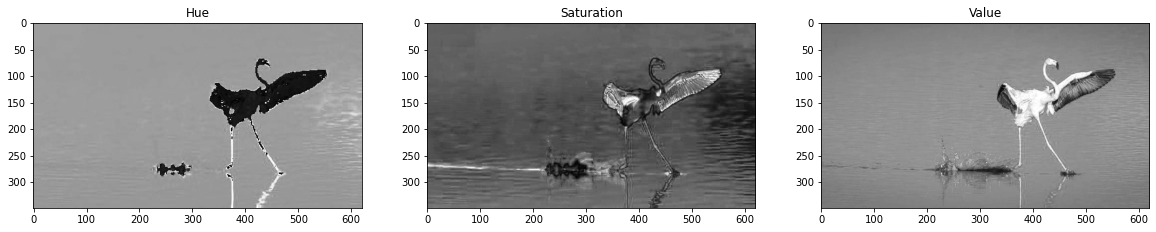

In [4]:
##Convert to HSV
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_RGB2HSV)
ShowThreeImages(img_color[:,:,0],img_color[:,:,1],img_color[:,:,2], "Blue", "Green", "Red")
ShowThreeImages(img_hsv[:,:,0],img_hsv[:,:,1],img_hsv[:,:,2], "Hue", "Saturation", "Value")

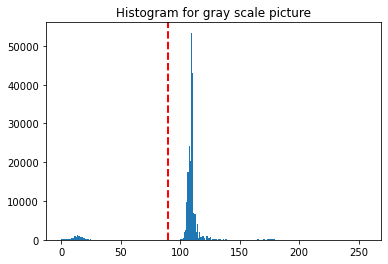

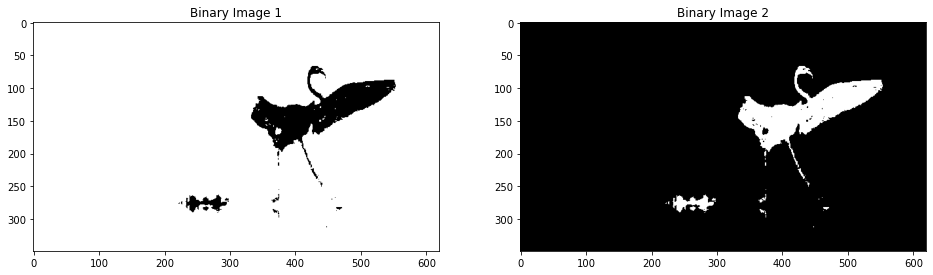

In [5]:
##Image segmentation in Hue color space
hue_img = img_hsv[:,:,0]
hue_threshold = 90

hist = cv2. calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.axvline(x=hue_threshold, color = 'r', linestyle='dashed', linewidth=2)
plt.title('Histogram for gray scale picture')
plt.show()

hue_binary01 = hue_img > hue_threshold
hue_binary02 = 1 - hue_binary01

ShowTwoImages(hue_binary01, hue_binary02, "Binary Image 1", "Binary Image 2")

In [6]:
def SegmentColorImageByMask(IM, Mask):
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

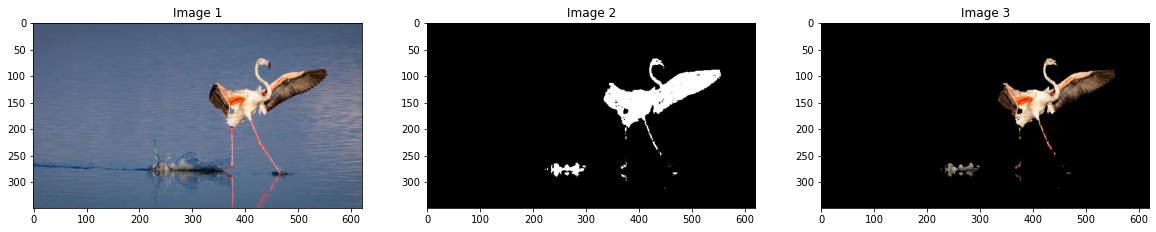

In [7]:
##Display object using mask
hue_binary02_rgb = SegmentColorImageByMask(img_color, hue_binary02)
ShowThreeImages(img_color, hue_binary02, hue_binary02_rgb)

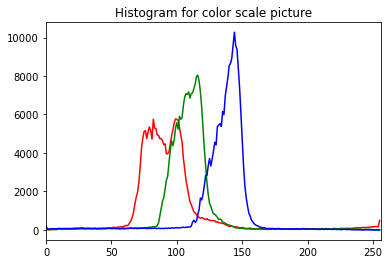

In [8]:
##Show histogram of RGB
color = ('r', 'g', 'b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img_color],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

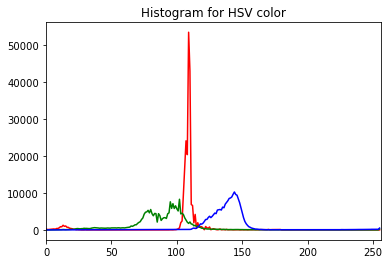

In [9]:
##Show histpgram of HSV
color = ('r', 'g', 'b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img_hsv],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for HSV color')
plt.show()

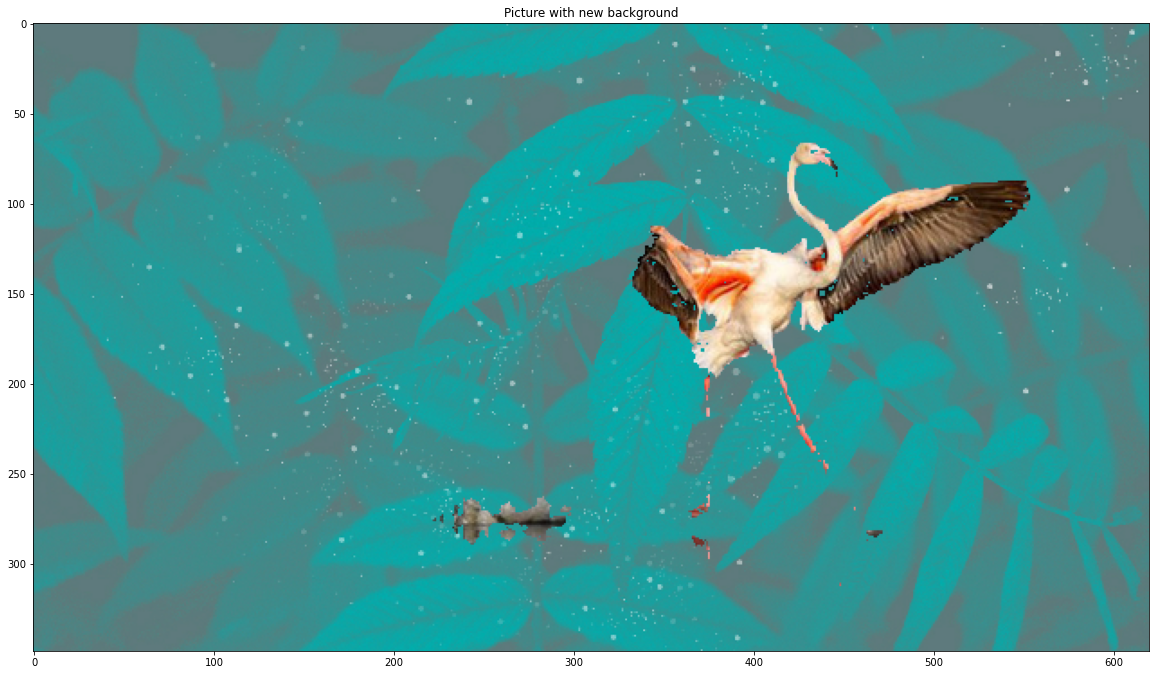

In [10]:
##Replace background
img_back = imread("Image/background.jpg")
height, width = hue_binary02_rgb.shape[:2]
resize_back = cv2.resize(img_back, (width, height), interpolation = cv2.INTER_CUBIC)
for i in range(width):
    for j in range(height):
        pixel = hue_binary02_rgb[j, i]
        if np.all(pixel == [0, 0, 0]):
            hue_binary02_rgb[j, i] = resize_back[j, i]
ShowOneImage(hue_binary02_rgb, "Picture with new background")

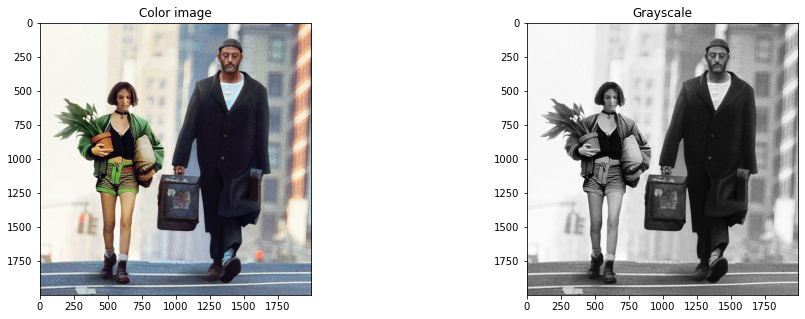

In [11]:
#EX 2: 
##Convert to grayscale
img_color = imread("Image/Leon.jpg")
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
ShowTwoImages(img_color, img_gray, "Color image", "Grayscale")

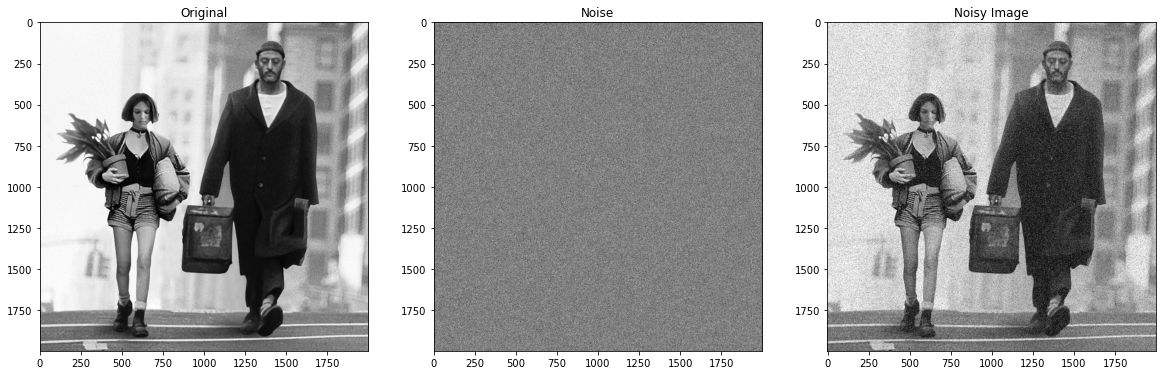

In [12]:
##Add noise to image
noise = np.random.random(img_gray.shape)
img_noise = img_gray.copy()
img_noise[noise > 0.9] = 255
img_noise[noise < 0.1] = 0
ShowThreeImages(img_gray, noise, img_noise, "Original", "Noise", "Noisy Image")

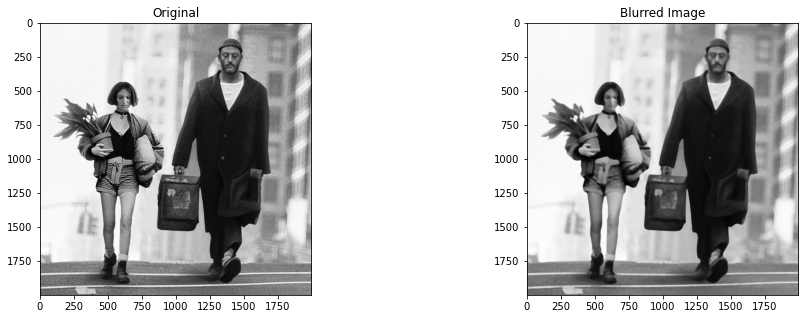

In [13]:
##Blur image
from skimage.filters.rank import median
from skimage.morphology import disk

img_blurred = median(img_gray, disk(10))
ShowTwoImages(img_gray, img_blurred, "Original", "Blurred Image")

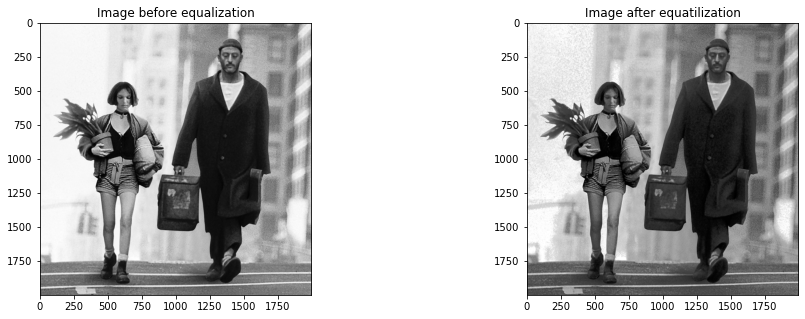

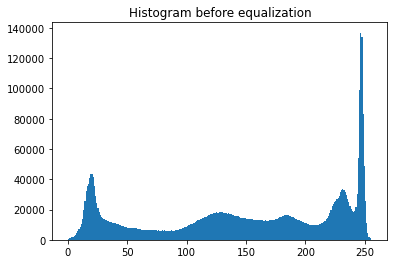

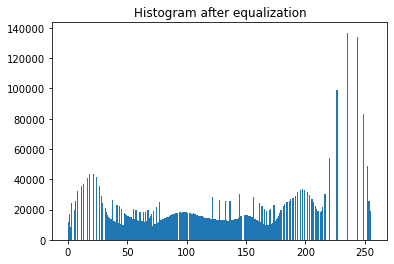

In [14]:
##Display histogram of grayscale image
##Equalize histogram and show an image after equalization
from skimage import data, exposure
img_equalization = exposure.equalize_hist(img_gray)
img_equalization = np.float32(img_equalization * 255)
ShowTwoImages(img_gray, img_equalization, "Image before equalization", "Image after equatilization")

hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
plt.hist(img_gray.ravel(),256,[0,256])
plt.title('Histogram before equalization')
plt.show()

hist = cv2.calcHist([img_equalization],[0],None,[256],[0,256])
plt.hist(img_equalization.ravel(),256,[0,256])
plt.title('Histogram after equalization')
plt.show()

In [15]:
def histogram_equalize(img):
    r, g, b = cv2.split(img)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    return cv2.merge((red, green, blue))

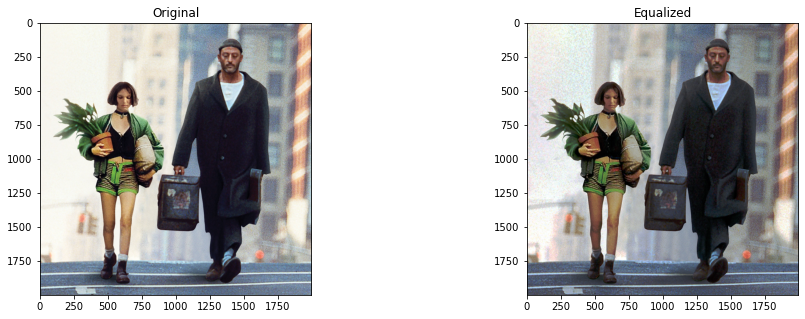

In [16]:
##Equalized image with colors
img_equalization_color = histogram_equalize(img_color)
ShowTwoImages(img_color, img_equalization_color, "Original", "Equalized")

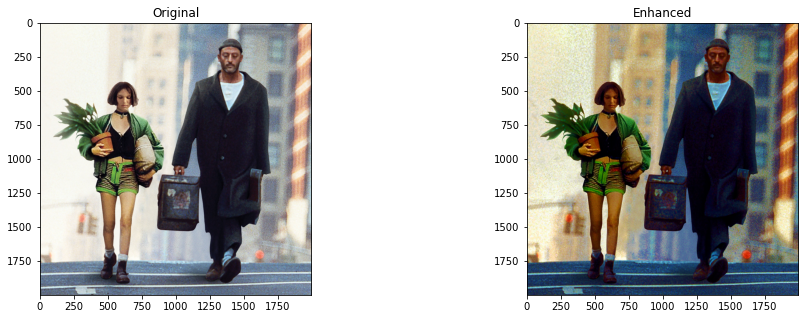

In [17]:
##Enhanced the contract of equalized image in s range and v range
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_RGB2HSV)
channel = 1
img_hsv[:,:,channel] = cv2.equalizeHist(img_hsv[:,:,channel])
channel = 2
img_hsv[:,:,channel] = cv2.equalizeHist(img_hsv[:,:,channel])
img_enhanced = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(img_color, img_enhanced, "Original", "Enhanced")

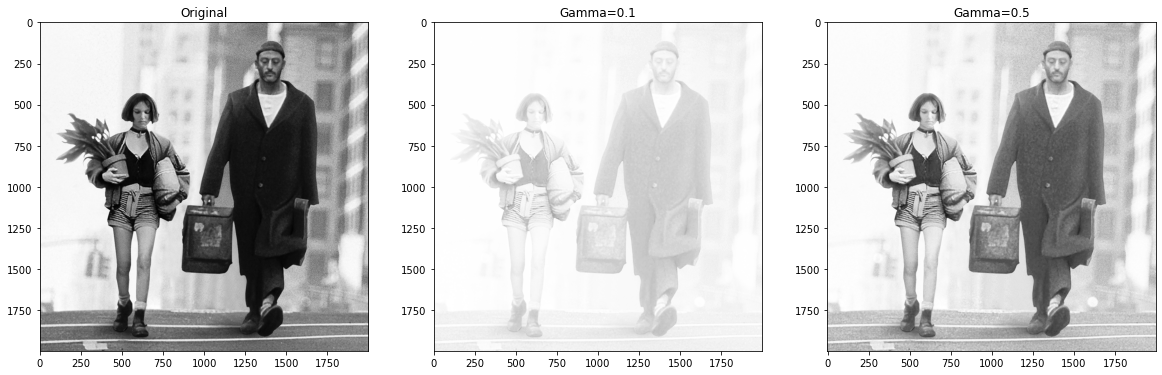

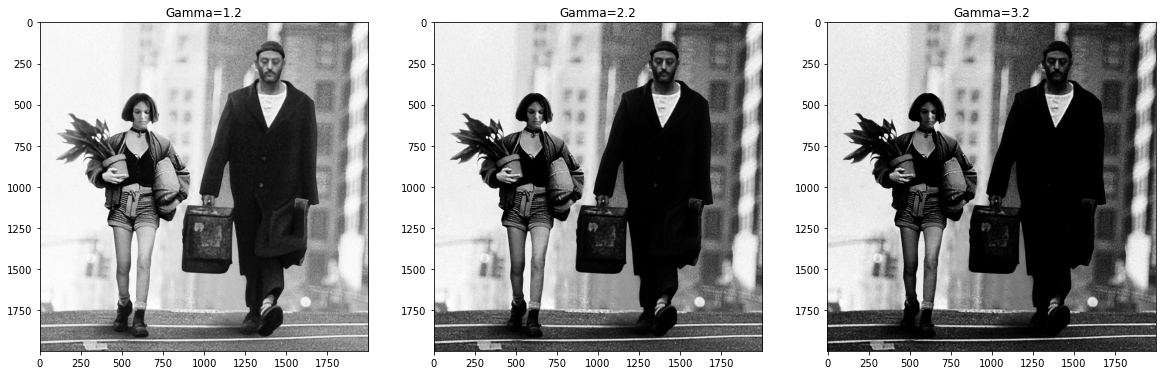

In [18]:
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_RGB2HSV)
img = img_hsv[:,:,2]

gamma = [0.1, 0.5, 1.2, 2.2, 3.2]
gamma_corrected_01 = np.array(255*(img / 255) ** gamma[0], dtype = 'uint8')
gamma_corrected_02 = np.array(255*(img / 255) ** gamma[1], dtype = 'uint8')
gamma_corrected_03 = np.array(255*(img / 255) ** gamma[2], dtype = 'uint8')
gamma_corrected_04 = np.array(255*(img / 255) ** gamma[3], dtype = 'uint8')
gamma_corrected_05 = np.array(255*(img / 255) ** gamma[4], dtype = 'uint8')

ShowThreeImages(img_gray, gamma_corrected_01, gamma_corrected_02, "Original", "Gamma=0.1", "Gamma=0.5")
ShowThreeImages(gamma_corrected_03, gamma_corrected_04, gamma_corrected_05, "Gamma=1.2", "Gamma=2.2", "Gamma=3.2")

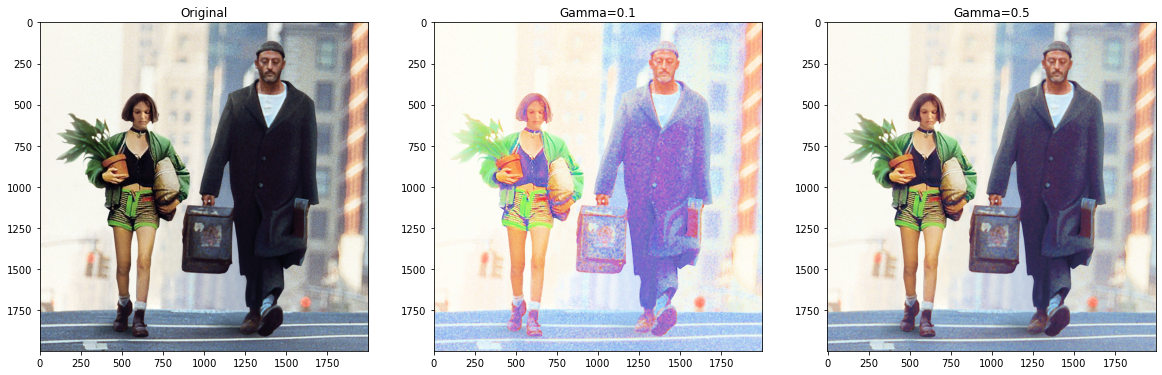

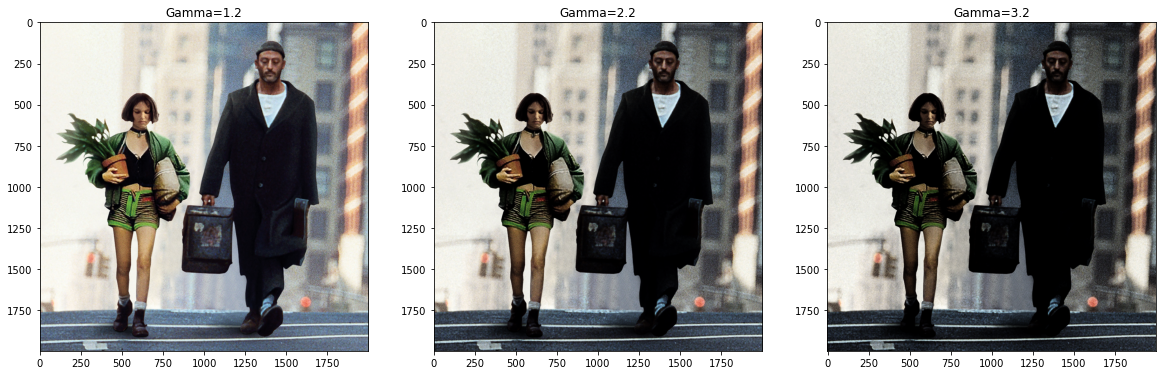

In [19]:
channel = 2
img_hsv_01 = img_hsv.copy()
img_hsv_01[:,:,2] = gamma_corrected_01
img_enhanced_01 = cv2.cvtColor(img_hsv_01, cv2.COLOR_HSV2RGB)
img_hsv_02 = img_hsv.copy()
img_hsv_02[:,:,2] = gamma_corrected_02
img_enhanced_02 = cv2.cvtColor(img_hsv_02, cv2.COLOR_HSV2RGB)
img_hsv_03 = img_hsv.copy()
img_hsv_03[:,:,2] = gamma_corrected_03
img_enhanced_03 = cv2.cvtColor(img_hsv_03, cv2.COLOR_HSV2RGB)
img_hsv_04 = img_hsv.copy()
img_hsv_04[:,:,2] = gamma_corrected_04
img_enhanced_04 = cv2.cvtColor(img_hsv_04, cv2.COLOR_HSV2RGB)
img_hsv_05 = img_hsv.copy()
img_hsv_05[:,:,2] = gamma_corrected_05
img_enhanced_05 = cv2.cvtColor(img_hsv_05, cv2.COLOR_HSV2RGB)

ShowThreeImages(img_color, img_enhanced_01, img_enhanced_02, "Original", "Gamma=0.1", "Gamma=0.5")
ShowThreeImages(img_enhanced_03, img_enhanced_04, img_enhanced_05, "Gamma=1.2", "Gamma=2.2", "Gamma=3.2")

In [20]:
def pixelValTransformation(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

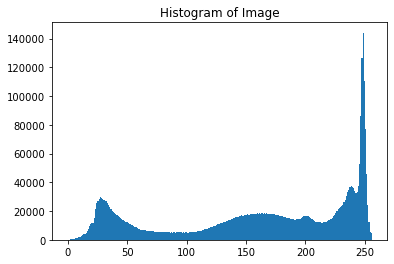

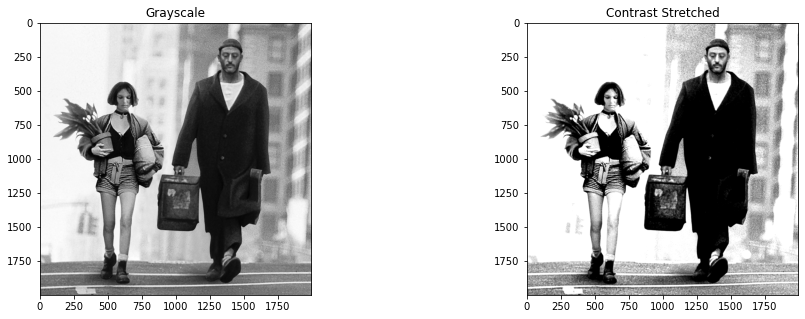

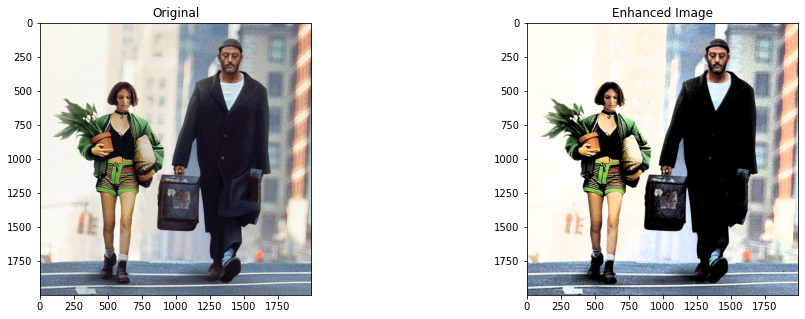

In [21]:
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_RGB2HSV)
img_hsv_value = img_hsv[:,:,2]

hist = cv2.calcHist([img_hsv_value],[0],None,[256],[0,256])
plt.hist(img_hsv_value.ravel(),256,[0,256])
plt.title('Histogram of Image')
plt.show()

r1 = 50
s1 = 0
r2 = 200
s2 = 255

pixelVal_vec = np.vectorize(pixelValTransformation)
contrast_stretched = pixelVal_vec(img_hsv_value, r1, s1, r2, s2)

img_hsv[:,:,2] = contrast_stretched
img_enhanced = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

ShowTwoImages(img_gray, contrast_stretched, "Grayscale", "Contrast Stretched")
ShowTwoImages(img_color, img_enhanced, "Original", "Enhanced Image")

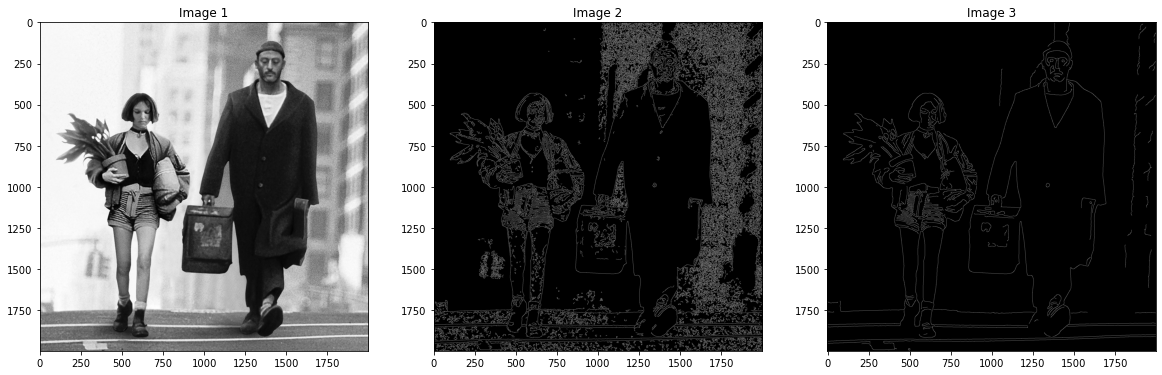

In [22]:
##Detect image edges
from skimage import feature

img_edges_01 = feature.canny(img_gray)
img_edges_02 = feature.canny(img_gray, sigma=3)
ShowThreeImages(img_gray, img_edges_01, img_edges_02)

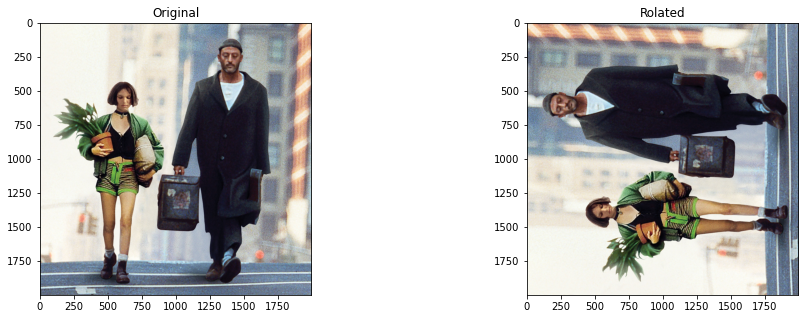

In [23]:
(h, w, d) = img_color.shape 
center = (w // 2, h // 2) 
M = cv2.getRotationMatrix2D(center, 90, 1.0) 
img_rotated = cv2.warpAffine(img_color, M, (w, h))
ShowTwoImages(img_color, img_rotated, "Original", "Rolated")